In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model

from scipy.stats import linregress
from contact_resistance_v2 import idea

sns.set_theme(style = 'ticks', palette = 'deep')

,Spacing ($\mu$m),Resistance (M$\Omega$),Column,Fit
0,0.0002,1.736811e+06,C1,1.774578e+06
1,0.0005,3.792560e+06,C1,3.435733e+06
2,0.0010,6.299890e+06,C1,6.190589e+06
3,0.0020,1.107543e+07,C1,1.164936e+07
4,0.0002,1.620727e+06,C2,1.774578e+06
5,0.0005,3.487960e+06,C2,3.435733e+06
6,0.0010,6.283615e+06,C2,6.190589e+06
7,0.0020,1.155309e+07,C2,1.164936e+07
8,0.0002,1.828198e+06,C3,1.774578e+06
9,0.0005,3.605491e+06,C3,3.435733e+06


,Potential (V),Current (A),Time (s),Structure,Spacing ($\mu$m)
0,0.050049,2.810669e-08,67.322064,P01,0.0002
1,0.100098,5.633545e-08,67.822552,P01,0.0002
2,0.150146,8.447266e-08,68.323040,P01,0.0002
3,0.200195,1.126404e-07,68.823528,P01,0.0002
4,0.250244,1.409607e-07,69.324016,P01,0.0002
...,...,...,...,...,...
75,-0.200195,-1.577759e-08,102.562502,P04,0.0020
76,-0.150146,-1.177979e-08,103.062990,P04,0.0020
77,-0.100098,-7.720947e-09,103.563478,P04,0.0020
78,-0.050049,-3.814697e-09,104.063966,P04,0.0020


,Sheet resistance ($\Omega$/sq),Contact resistance ($\Omega$/sq),Conductivity (S/cm)
0,1.052442e+11,331843.057382,0.000001


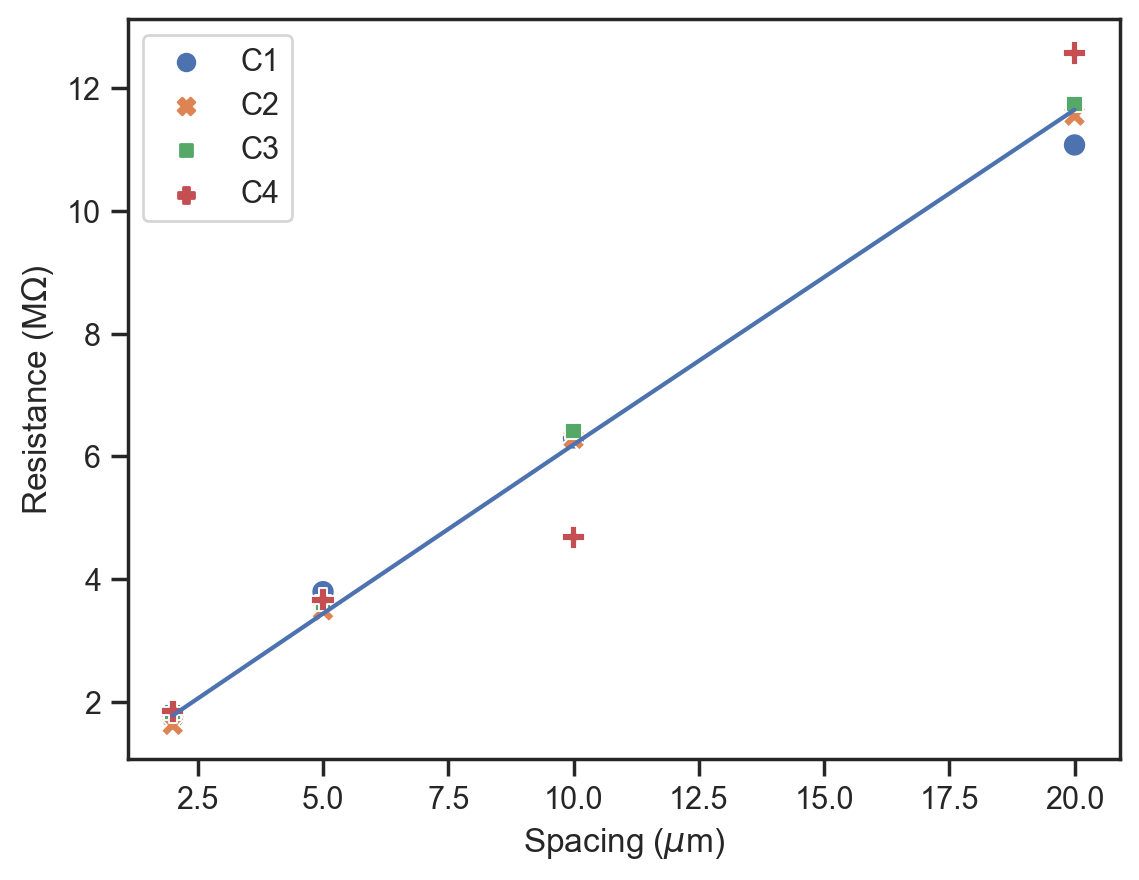

In [13]:
path_aut = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_23'
files_aut = [os.path.join(path_aut, i) for i in os.listdir(path_aut)]

rt, tlm, val = idea.fit(files_aut, 80)

fig, ax = plt.subplots(dpi = 200)
sns.scatterplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Resistance (M$\Omega$)', hue = 'Column', style = 'Column', s = 70)
sns.lineplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Fit')
ax.xaxis.set_major_formatter(lambda x, pos: '{:.1f}'.format(x * 1e4))
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))

display(tlm)
display(rt)
val